### Load libraries

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from torchvision import models
from torchvision.transforms import Compose, Normalize, Resize, ToPILImage, ToTensor
from torch import optim
from torch.nn import functional as F

### Loading data

In [3]:
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder

In [4]:
import json

In [5]:
# Get the imageNet Class label names
!curl -k https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/imageNetclasses.json -o "imageNetclasses.json"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 33567  100 33567    0     0  25163      0  0:00:01  0:00:01 --:--:-- 25200


In [7]:
with open('imageNetclasses.json') as f:
    class_names = json.load(f)

In [8]:
class_names

{'0': 'tench, Tinca tinca',
 '1': 'goldfish, Carassius auratus',
 '2': 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 '3': 'tiger shark, Galeocerdo cuvieri',
 '4': 'hammerhead, hammerhead shark',
 '5': 'electric ray, crampfish, numbfish, torpedo',
 '6': 'stingray',
 '7': 'cock',
 '8': 'hen',
 '9': 'ostrich, Struthio camelus',
 '10': 'brambling, Fringilla montifringilla',
 '11': 'goldfinch, Carduelis carduelis',
 '12': 'house finch, linnet, Carpodacus mexicanus',
 '13': 'junco, snowbird',
 '14': 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 '15': 'robin, American robin, Turdus migratorius',
 '16': 'bulbul',
 '17': 'jay',
 '18': 'magpie',
 '19': 'chickadee',
 '20': 'water ouzel, dipper',
 '21': 'kite',
 '22': 'bald eagle, American eagle, Haliaeetus leucocephalus',
 '23': 'vulture',
 '24': 'great grey owl, great gray owl, Strix nebulosa',
 '25': 'European fire salamander, Salamandra salamandra',
 '26': 'common newt, Triturus vulga

In [9]:
data_dir = os.environ["DATASETS"] + "/" + "vegetables/Vegetable-Images"
train_data_dir = data_dir + "/" + "train"
validation_data_dir = data_dir + "/" + "validation"
test_data_dir = data_dir + "/" + "test"

In [10]:
labels = os.listdir(train_data_dir)
labels

['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

In [11]:
transform = Compose([
    Resize((224, 224)),
    ToTensor(),
    Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

In [12]:
train_data = ImageFolder(
    root=train_data_dir,
    transform=transform,
)

validation_data = ImageFolder(
    root=validation_data_dir,
    transform=transform,
)

In [13]:
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=2)
validation_dataloader = DataLoader(validation_data, batch_size=32, shuffle=True, num_workers=2)

In [82]:
im, cls = next(iter(train_dataloader))

In [83]:
im.shape, cls.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [84]:
cls

tensor([10, 10,  7,  8,  6,  2,  8,  6, 14,  1, 14, 11,  1, 11,  4,  9,  6,  2,
         2,  2,  9,  2,  0,  4,  9,  8,  4, 13, 13, 10, 14,  6])

### Visualize data

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


<Figure size 1600x1600 with 0 Axes>

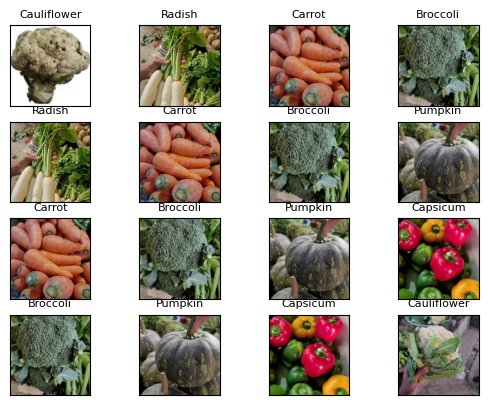

In [65]:
plt.figure(figsize=(16, 16))

nrows = 4
ncols = 4

_, ax = plt.subplots(
    nrows,
    ncols,
    squeeze=True,
)

images = im[:16]
classes = cls[:16]
fontdict = {
    'fontsize': 8,
    'verticalalignment': 'baseline',
    'horizontalalignment': 'center',
}

for i in range(nrows):
    for j in range(ncols):
        img = ToPILImage()(im[i+j])
        print(np.array(img).shape)
        ax[i][j].imshow(img)
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        ax[i][j].set_title(labels[cls[i+j]], loc='center', **fontdict)

plt.show()

In [86]:
from torchvision.transforms import Lambda

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


<Figure size 1600x1600 with 0 Axes>

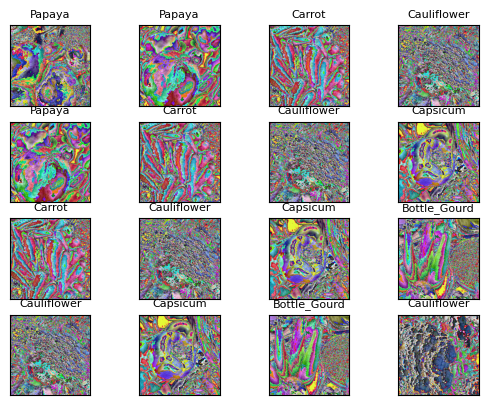

In [89]:
plt.figure(figsize=(16, 16))

nrows = 4
ncols = 4

_, ax = plt.subplots(
    nrows,
    ncols,
    squeeze=True,
)

images = im[:16]
classes = cls[:16]
fontdict = {
    'fontsize': 8,
    'verticalalignment': 'baseline',
    'horizontalalignment': 'center',
}

inverse_norm = Compose([
    Lambda(lambda img: img * 0.224),
    Lambda(lambda img: img + 0.406),
])

# [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]

for i in range(nrows):
    for j in range(ncols):
        tensor = im[i+j]
        inv_norm_tensor = inverse_norm(tensor)
        img = ToPILImage()(tensor)
        print(np.array(img).shape)
        ax[i][j].imshow(img)
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        ax[i][j].set_title(labels[cls[i+j]], loc='center', **fontdict)

plt.show()

## Using pre-trained network.

In [14]:
from torchvision.models import resnet50
from torchsummary import summary

In [30]:
model = resnet50(pretrained=True)

C:\Python11\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Python11\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [31]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [32]:
summary(model, input_size = (3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [34]:
from torch.autograd import Variable

In [92]:
def predict_image(images, class_names):
    to_pil = ToPILImage()
    fig = plt.figure(figsize=(16,16))

    for (i,image) in enumerate(images):
        image = to_pil(image)
        image_tensor = transform(image).float().unsqueeze_(0)
        input = Variable(image_tensor).to("cpu")
        output = model(input)
        index = output.data.cpu().numpy().argmax()
        name = class_names[str(index)]

        sub = fig.add_subplot(len(images),1, i+1)
        sub.set_title(f'Predicted {str(name)}', **fontdict)
        plt.axis('off')
        plt.imshow(image)
    plt.show()

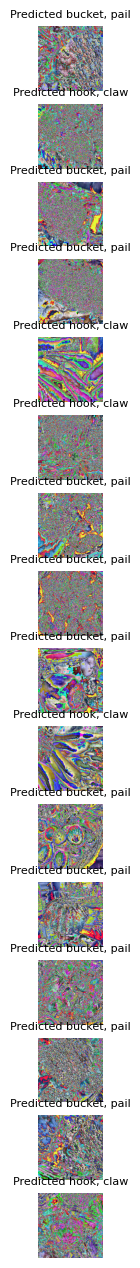

In [93]:
val_images, _ = next(iter(validation_dataloader))
predict_image(val_images[:16], class_names)

## Fine-tuning the model

In [15]:
import copy
import time

In [16]:
from torch import set_grad_enabled, max, sum
from torch.nn import CrossEntropyLoss, Linear
from torch.optim import lr_scheduler, SGD

In [17]:
dataloaders = {
    "train": train_dataloader,
    "val": validation_data,
}

<img src="./torch-backward.JPG" style="width:600px">
<img src="./torch-optim-step.JPG" style="width:600px">
<img src="./torch-set_grad_enabled.JPG" style="width:600px">


In [18]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to("cpu")
                labels = labels.to("cpu")

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += sum(preds == labels.data)
                
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [19]:
model_ft = resnet50(pretrained=True)
num_features = model_ft.fc.in_features

# Here the size of each output sample is set to 15.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = Linear(num_features, 15)
model_ft = model_ft.to("cpu")

criterion = CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

C:\Python11\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Python11\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [20]:
model_ft = train_model(
    model_ft,
    criterion,
    optimizer_ft,
    exp_lr_scheduler,
    num_epochs=5,
)

Epoch 0/4
----------


KeyboardInterrupt: 

In [ ]:
# https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

class VegetablesDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        pass

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        pass